In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.5
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.5_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.5_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.8412

Best Fitness:	600.5055
Solution:	600.0000
Diff:		0.5055

[0:06:33][----------] 1.96% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.8663

Best Fitness:	600.4722
Solution:	600.0000
Diff:		0.4722

[0:12:40][----------] 3.92% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.3432

Best Fitness:	600.9072
Solution:	600.0000
Diff:		0.9072

[0:18:32][#---------] 5.88% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.3351

Best Fitness:	600.9181
Solution:	600.0000
Diff:		0.9181

[0:25:00][#---------] 7.84% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.7997

Best Fitness:	600.4627
Solution:	600.0000
Diff:		0.4627

[0:30:56][#---------] 9.80% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.3557

Best Fitness:	600.8102
Solution:	600.0000
Diff:		0.8102

[0:36:46][#---------] 11.76% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.0152

Best Fitness:	600.6565
Solution:	600.0000
Diff:		0.6565

[0:42:12][#---------] 13.73% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	603.1865

Best Fitness:	602.3630
Solution:	600.0000
Diff:		2.3630

[0:47:18][##--------] 15.69% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.3247

Best Fitness:	600.8295
Solution:	600.0000
Diff:		0.8295

[0:52:41][##--------] 17.65% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.6616

Best Fitness:	600.3123
Solution:	600.0000
Diff:		0.3123

[0:57:41][##--------] 19.61% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	602.1952

Best Fitness:	601.4017
Solution:	600.0000
Diff:		1.4017

[1:02:41][##--------] 21.57% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.6589

Best Fitness:	601.0445
Solution:	600.0000
Diff:		1.0445

[1:07:47][##--------] 23.53% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.7744

Best Fitness:	600.4902
Solution:	600.0000
Diff:		0.4902

[1:12:33][###-------] 25.49% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.8399

Best Fitness:	600.4868
Solution:	600.0000
Diff:		0.4868

[1:17:23][###-------] 27.45% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.0277

Best Fitness:	600.6484
Solution:	600.0000
Diff:		0.6484

[1:22:37][###-------] 29.41% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	602.8489

Best Fitness:	602.1533
Solution:	600.0000
Diff:		2.1533

[1:27:32][###-------] 31.37% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	602.1411

Best Fitness:	601.3535
Solution:	600.0000
Diff:		1.3535

[1:32:34][###-------] 33.33% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.1242

Best Fitness:	600.6623
Solution:	600.0000
Diff:		0.6623

[1:37:04][####------] 35.29% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.6161

Best Fitness:	600.3307
Solution:	600.0000
Diff:		0.3307

[1:41:21][####------] 37.25% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.0499

Best Fitness:	600.6649
Solution:	600.0000
Diff:		0.6649

[1:45:37][####------] 39.22% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.6831

Best Fitness:	600.3965
Solution:	600.0000
Diff:		0.3965

[1:50:16][####------] 41.18% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.4328

Best Fitness:	600.8803
Solution:	600.0000
Diff:		0.8803

[1:54:38][####------] 43.14% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.5105

Best Fitness:	601.0456
Solution:	600.0000
Diff:		1.0456

[1:59:05][#####-----] 45.10% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.9509

Best Fitness:	600.6019
Solution:	600.0000
Diff:		0.6019

[2:03:30][#####-----] 47.06% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.2993

Best Fitness:	600.7225
Solution:	600.0000
Diff:		0.7225

[2:07:56][#####-----] 49.02% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.7332

Best Fitness:	601.2028
Solution:	600.0000
Diff:		1.2028

[2:12:18][#####-----] 50.98% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.3899

Best Fitness:	600.8932
Solution:	600.0000
Diff:		0.8932

[2:16:33][#####-----] 52.94% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	602.1126

Best Fitness:	601.0501
Solution:	600.0000
Diff:		1.0501

[2:20:58][#####-----] 54.90% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.5701

Best Fitness:	600.9073
Solution:	600.0000
Diff:		0.9073

[2:24:51][######----] 56.86% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.3093

Best Fitness:	600.8504
Solution:	600.0000
Diff:		0.8504

[2:28:46][######----] 58.82% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.9713

Best Fitness:	600.6616
Solution:	600.0000
Diff:		0.6616

[2:32:36][######----] 60.78% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.8591

Best Fitness:	600.5973
Solution:	600.0000
Diff:		0.5973

[2:36:19][######----] 62.75% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.1053

Best Fitness:	600.7035
Solution:	600.0000
Diff:		0.7035

[2:40:01][######----] 64.71% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.8219

Best Fitness:	600.5782
Solution:	600.0000
Diff:		0.5782

[2:43:47][#######---] 66.67% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	602.1721

Best Fitness:	601.5869
Solution:	600.0000
Diff:		1.5869

[2:47:34][#######---] 68.63% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.8389

Best Fitness:	600.5011
Solution:	600.0000
Diff:		0.5011

[2:51:26][#######---] 70.59% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.6969

Best Fitness:	600.4276
Solution:	600.0000
Diff:		0.4276

[2:55:18][#######---] 72.55% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.1764

Best Fitness:	600.8012
Solution:	600.0000
Diff:		0.8012

[2:59:11][#######---] 74.51% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.0392

Best Fitness:	600.6242
Solution:	600.0000
Diff:		0.6242

[3:02:56][########--] 76.47% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.2321

Best Fitness:	600.8216
Solution:	600.0000
Diff:		0.8216

[3:06:45][########--] 78.43% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.4517

Best Fitness:	600.8873
Solution:	600.0000
Diff:		0.8873

[3:10:08][########--] 80.39% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.6289

Best Fitness:	600.9988
Solution:	600.0000
Diff:		0.9988

[3:13:25][########--] 82.35% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.7307

Best Fitness:	600.3931
Solution:	600.0000
Diff:		0.3931

[3:16:43][########--] 84.31% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.5049

Best Fitness:	601.0238
Solution:	600.0000
Diff:		1.0238

[3:19:57][#########-] 86.27% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.7158

Best Fitness:	601.1647
Solution:	600.0000
Diff:		1.1647

[3:23:15][#########-] 88.24% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.1174

Best Fitness:	600.7353
Solution:	600.0000
Diff:		0.7353

[3:26:30][#########-] 90.20% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.0902

Best Fitness:	600.6377
Solution:	600.0000
Diff:		0.6377

[3:29:48][#########-] 92.16% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.0210

Best Fitness:	600.7275
Solution:	600.0000
Diff:		0.7275

[3:33:05][#########-] 94.12% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.1898

Best Fitness:	600.8165
Solution:	600.0000
Diff:		0.8165

[3:36:28][##########] 96.08% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	601.1201

Best Fitness:	600.7291
Solution:	600.0000
Diff:		0.7291

[3:39:45][##########] 98.04% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	600.9008

Best Fitness:	600.5586
Solution:	600.0000
Diff:		0.5586

[3:42:55][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:42:55

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
160,0.902225,0.870625,1.041229,1.05935,1.002386,0.916602,0.835682,0.933878,1.051756,1.259030,...,0.686759,1.124726,1.096174,0.839997,0.992765,0.975447,1.111554,0.824613,1.006603,50
161,0.902225,0.870625,1.041229,0.70457,1.002386,0.916602,0.835682,0.933878,1.051756,1.127769,...,0.686759,0.986179,1.096174,0.839997,0.992765,0.975447,1.111554,0.824613,1.006603,50
162,0.902225,0.870625,0.932602,0.70457,1.002386,0.916602,0.835682,0.933878,0.764063,0.907863,...,0.686759,0.859584,0.861855,0.839997,0.992765,0.904555,1.111554,0.824613,0.847147,50
163,0.902225,0.870625,0.932602,0.70457,1.002386,0.916602,0.835682,0.933878,0.764063,0.907863,...,0.686759,0.859584,0.861855,0.839997,0.992765,0.904555,0.971478,0.824613,0.847147,50
164,0.902225,0.870625,0.932602,0.70457,1.002386,0.916602,0.835682,0.933878,0.764063,0.907863,...,0.686759,0.859584,0.861855,0.839997,0.992765,0.904555,0.886866,0.783202,0.847147,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.5055163704175811

Best error for run 1: 0.4721941627351498

Best error for run 2: 0.9071707114711671

Best error for run 3: 0.9181132677553023

Best error for run 4: 0.46267856022132037

Best error for run 5: 0.8101952033192674

Best error for run 6: 0.6564736793902739

Best error for run 7: 2.362966534500856

Best error for run 8: 0.8295483979104574

Best error for run 9: 0.31225291540192757

Best error for run 10: 1.4016934330282993

Best error for run 11: 1.0445223431482873

Best error for run 12: 0.4902239160788895

Best error for run 13: 0.4868047661534547

Best error for run 14: 0.6483957230824444

Best error for run 15: 2.153304700966487

Best error for run 16: 1.353540274949978

Best error for run 17: 0.6622592472887163

Best error for run 18: 0.3307469871928106

Best error for run 19: 0.6648886040918569

Best error for run 20: 0.3965042261739882

Best error for run 21: 0.8802775947048076

Best error for run 22: 1.045609325149826

Best error for run 23: 0.6018985318895602

Best error for run 24: 0.7225495812423333

Best error for run 25: 1.202817941489684

Best error for run 26: 0.8932371089067601

Best error for run 27: 1.0501240208370746

Best error for run 28: 0.9072761812564067

Best error for run 29: 0.8504357246160907

Best error for run 30: 0.6616122220665375

Best error for run 31: 0.597265350462294

Best error for run 32: 0.7034872268495747

Best error for run 33: 0.578176477039051

Best error for run 34: 1.5869107243896678

Best error for run 35: 0.5011261349582128

Best error for run 36: 0.4275952338133493

Best error for run 37: 0.8011728323508578

Best error for run 38: 0.6241631081577452

Best error for run 39: 0.8216153644975748

Best error for run 40: 0.8872975237710534

Best error for run 41: 0.9988080539495741

Best error for run 42: 0.3931297405570149

Best error for run 43: 1.0238328163767392

Best error for run 44: 1.164703973464384

Best error for run 45: 0.7352646472479591

Best error for run 46: 0.6376514680736136

Best error for run 47: 0.7275149483068617

Best error for run 48: 0.8165083322630835

Best error for run 49: 0.7290546005976921

Best error for run 50: 0.5585584121348575

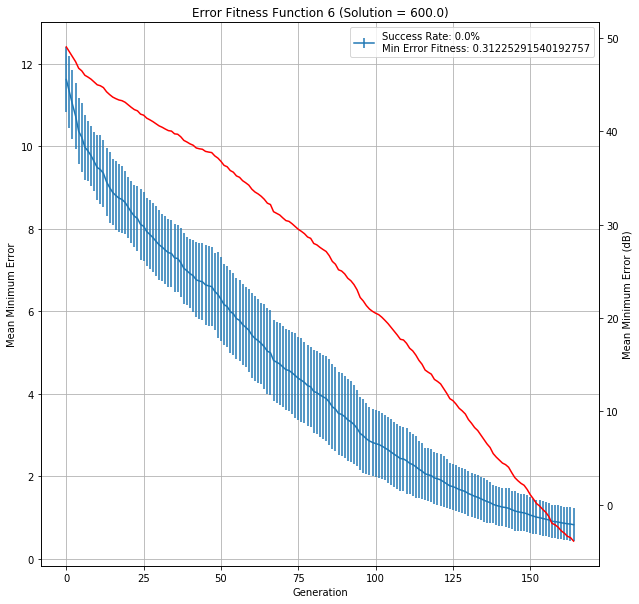

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.5_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.5,0.505516,0.472194,0.907171,0.918113,0.462679,0.810195,...,1.164704,0.735265,0.637651,0.727515,0.816508,0.729055,0.558558,0.823523,3:42:55,50100
